# Automated Sales and Inventory Analysis System for Operational Efficiency

 

## Business Problem
Khen Enterprises, a growing FMCG distributor, relies on manual processes to monitor sales performance and inventory levels across multiple product lines. Sales data and inventory records are stored in separate spreadsheets, requiring time-consuming and error-prone efforts to consolidate and analyze them.

This delay in visibility leads to:

Missed opportunities to restock fast-moving products

Overstocking of slow-moving items, tying up capital

Inability to quickly assess revenue trends

Reactive instead of proactive decision-making

 ### Proposed Solution
To address this, we developed an automated data analysis system that:

Ingests raw sales and inventory data from CSV files

Merges datasets on a common identifier (PRODUCTCODE)

Generates:

1.Daily and Monthly Sales Trend Visualizations

2.Revenue Growth Rate Analysis

3.Enables quick, repeatable analysis with a single script execution

This automation eliminates the need for repetitive manual reporting and equips managers with real-time insights.

### Tools & Technologies Used

**Component	            Tool/Library	                 Purpose**

**Data Handling** 	      *pandas*	                  Load, clean, and merge datasets

**Date Processing**	      *datetime, pandas*	      Parse and transform order dates

**Data Visualization**     *matplotlib*	          Line charts for trend analysis

**Automation**	          *Python scripting*         Scheduled or on-demand execution

### Business Impact

**Impact  Area	                         Outcome**

**Inventory Optimization**	Early detection of low-stock and overstock situations

**Sales Intelligence**	    Clear visibility into sales trends and revenue growth

**Time Savings**	        Analysis time reduced from hours to minutes

**Decision Making**      	Enables data-driven planning instead of relying on ad hoc insights

**Scalability**	            Easy to scale across branches or integrate into larger systems


In [2]:
# Load Sales data
import pandas as pd

sales_data = pd.read_csv('C:/Users/USER/Downloads/khensales1.csv',encoding='Latin1')
 
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:

sales_data.shape


(2823, 25)

In [4]:
print(sales_data.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [3]:
# Load inventory data
inventory_data = pd.read_csv('C:/Users/USER/Downloads/kheninventory1.csv')
 
inventory_data.head()



,PRODUCTCODE,PRODUCTLINE,STOCKLEVEL,REORDERPOINT,RESTOCKDATE,SUPPLIERNAME,UNITCOST
0,S10_1678,Motorcycles,63,5,12/24/2024,Johnsons,315.43
1,S10_1949,Classic Cars,48,14,1/3/2025,SharksDT,375.62
2,S10_2016,Motorcycles,29,9,12/19/2024,Amerix,372.32
3,S10_4698,Motorcycles,91,18,12/30/2024,Johnsons,12.22
4,S10_4757,Classic Cars,53,13,12/15/2024,Amerix,420.84


In [6]:
print(inventory_data.columns)

Index(['PRODUCTCODE', 'PRODUCTLINE', 'STOCKLEVEL', 'REORDERPOINT',
       'RESTOCKDATE', 'SUPPLIERNAME', 'UNITCOST'],
      dtype='object')


In [7]:
#Fill or drop missing values:
sales_data.fillna(0, inplace=True)


In [4]:
inventory_data.shape


(109, 7)

In [6]:
#Step 3: Analyze Sales Trends
#Group by date or product:

daily_sales = sales_data.groupby('ORDERDATE')['SALES'].sum()
print(daily_sales)


ORDERDATE
1/10/2003 0:00     6864.05
1/10/2005 0:00    16628.16
1/12/2004 0:00    50490.64
1/12/2005 0:00    44273.36
1/15/2004 0:00    51172.65
                    ...   
9/30/2004 0:00    42744.06
9/5/2003 0:00     34992.40
9/7/2004 0:00      7673.38
9/8/2004 0:00     93717.43
9/9/2004 0:00     38039.00
Name: SALES, Length: 252, dtype: float64


In [7]:
# Find top-selling products:

top_products = sales_data.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)
print(top_products)


PRODUCTLINE
Classic Cars        33992
Vintage Cars        21069
Motorcycles         11663
Trucks and Buses    10777
Planes              10727
Ships                8127
Trains               2712
Name: QUANTITYORDERED, dtype: int64


In [8]:
#Step 4: Analyze Inventory Levels
#Identify products with low stock:

low_stock = inventory_data[inventory_data['STOCKLEVEL'] < 20]
print(low_stock)


    PRODUCTCODE       PRODUCTLINE  STOCKLEVEL  REORDERPOINT RESTOCKDATE  \
16     S18_1097  Trucks and Buses           1            14  12/27/2024   
24     S18_1984      Classic Cars           0            19   12/8/2024   
25     S18_2238      Classic Cars          13             5  12/13/2024   
26     S18_2248      Vintage Cars           3            18  12/25/2024   
39     S18_3232      Classic Cars          16            10    1/5/2025   
40     S18_3259            Trains          12             5  12/21/2024   
48     S18_4409      Vintage Cars           7            13    1/1/2025   
49     S18_4522      Vintage Cars           2             7    1/3/2025   
54     S24_1046      Classic Cars          13            13  12/23/2024   
60     S24_2000       Motorcycles           4            15  12/17/2024   
61     S24_2011             Ships           9             8  12/20/2024   
68     S24_2887      Classic Cars           5             7    1/4/2025   
72     S24_3371      Clas

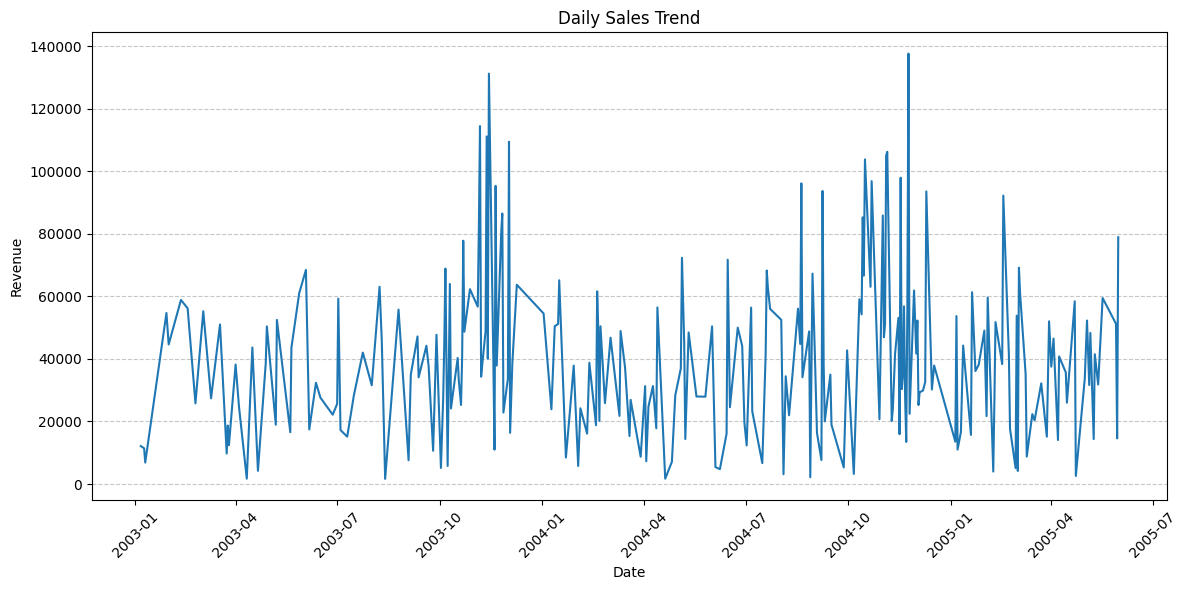

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data
def load_data(file_path):
    return pd.read_csv(file_path)

# Function to plot sales trends
def plot_sales_trends(data):
    # Convert ORDERDATE to datetime format
    data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

    # Group by date and sum sales
    daily_sales = data.groupby('ORDERDATE')['SALES'].sum()

    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales.index, daily_sales.values)
    plt.title('Daily Sales Trend')
    plt.xlabel('Date')
    plt.ylabel('Revenue')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

    # Add grid for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()  # Adjust layout to prevent label overlap
    plt.show()

# Example usage
file_path = 'C:/Users/USER/Downloads/khensales1.csv'
data = pd.read_csv(file_path, encoding='latin1')
plot_sales_trends(data)



Loaded data from C:/Users/USER/Downloads/khensales1.csv
Columns in dataset: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
Loaded data from C:/Users/USER/Downloads/kheninventory1.csv
Columns in dataset: ['PRODUCTCODE', 'PRODUCTLINE', 'STOCKLEVEL', 'REORDERPOINT', 'RESTOCKDATE', 'SUPPLIERNAME', 'UNITCOST']

Checking column names before merging...
Sales Data Columns: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
Inventory Dat

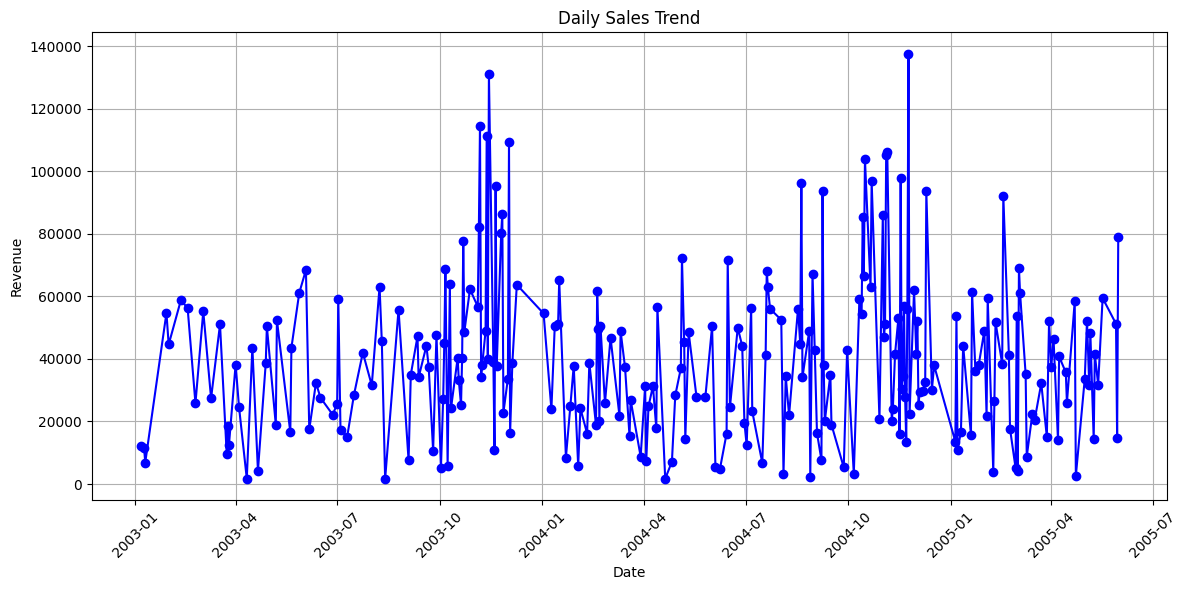

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

# Function to load data from different sources
def load_data(file_path):
    try:
        data = pd.read_csv(file_path,encoding='latin1')
        print(f"Loaded data from {file_path}")
        print("Columns in dataset:", data.columns.tolist())  # Debugging step
        return data
    except Exception as e:
        print(f"Error loading data from {file_path}: {e}")
        return None

# Combine Sales Data and Inventory Data
def combine_sales_inventory(sales_data, inventory_data):
    try:
        print("\nChecking column names before merging...")
        print("Sales Data Columns:", sales_data.columns.tolist())
        print("Inventory Data Columns:", inventory_data.columns.tolist())

        # Ensure PRODUCTCODE is used correctly (case-sensitive)
        if 'PRODUCTCODE' not in sales_data.columns or 'PRODUCTCODE' not in inventory_data.columns:
            raise KeyError("The column 'PRODUCTCODE' does not exist in one or both datasets.")

        # Perform merging
        combined_data = pd.merge(sales_data, inventory_data, on='PRODUCTCODE', how='inner')
        print(f"Successfully merged datasets! Combined data has {len(combined_data)} rows.")
        return combined_data
    except KeyError as e:
        print(f"Error combining datasets: {e}")
        return None

# Generate Sales Trend
def plot_sales_trends(data):
    try:
        # Convert 'ORDERDATE' to datetime if not already
        data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')

        # Drop rows with invalid dates
        data = data.dropna(subset=['ORDERDATE'])

        # Group and sum sales
        daily_sales = data.groupby('ORDERDATE')['SALES'].sum()

        plt.figure(figsize=(12, 6))
        plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
        plt.title('Daily Sales Trend')
        plt.xlabel('Date')
        plt.ylabel('Revenue')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting sales trends: {e}")

# Main function for automating the process
def automate_analysis(sales_file, inventory_file):
    # Load data
    sales_data = load_data(sales_file)
    inventory_data = load_data(inventory_file)

    if sales_data is not None and inventory_data is not None:
        # Combine datasets
        combined_data = combine_sales_inventory(sales_data, inventory_data)
        if combined_data is not None:
            # Perform analysis: Plot sales trend
            plot_sales_trends(combined_data)

# Example usage
if __name__ == "__main__":
    automate_analysis('C:/Users/USER/Downloads/khensales1.csv', 'C:/Users/USER/Downloads/kheninventory1.csv')
    
   


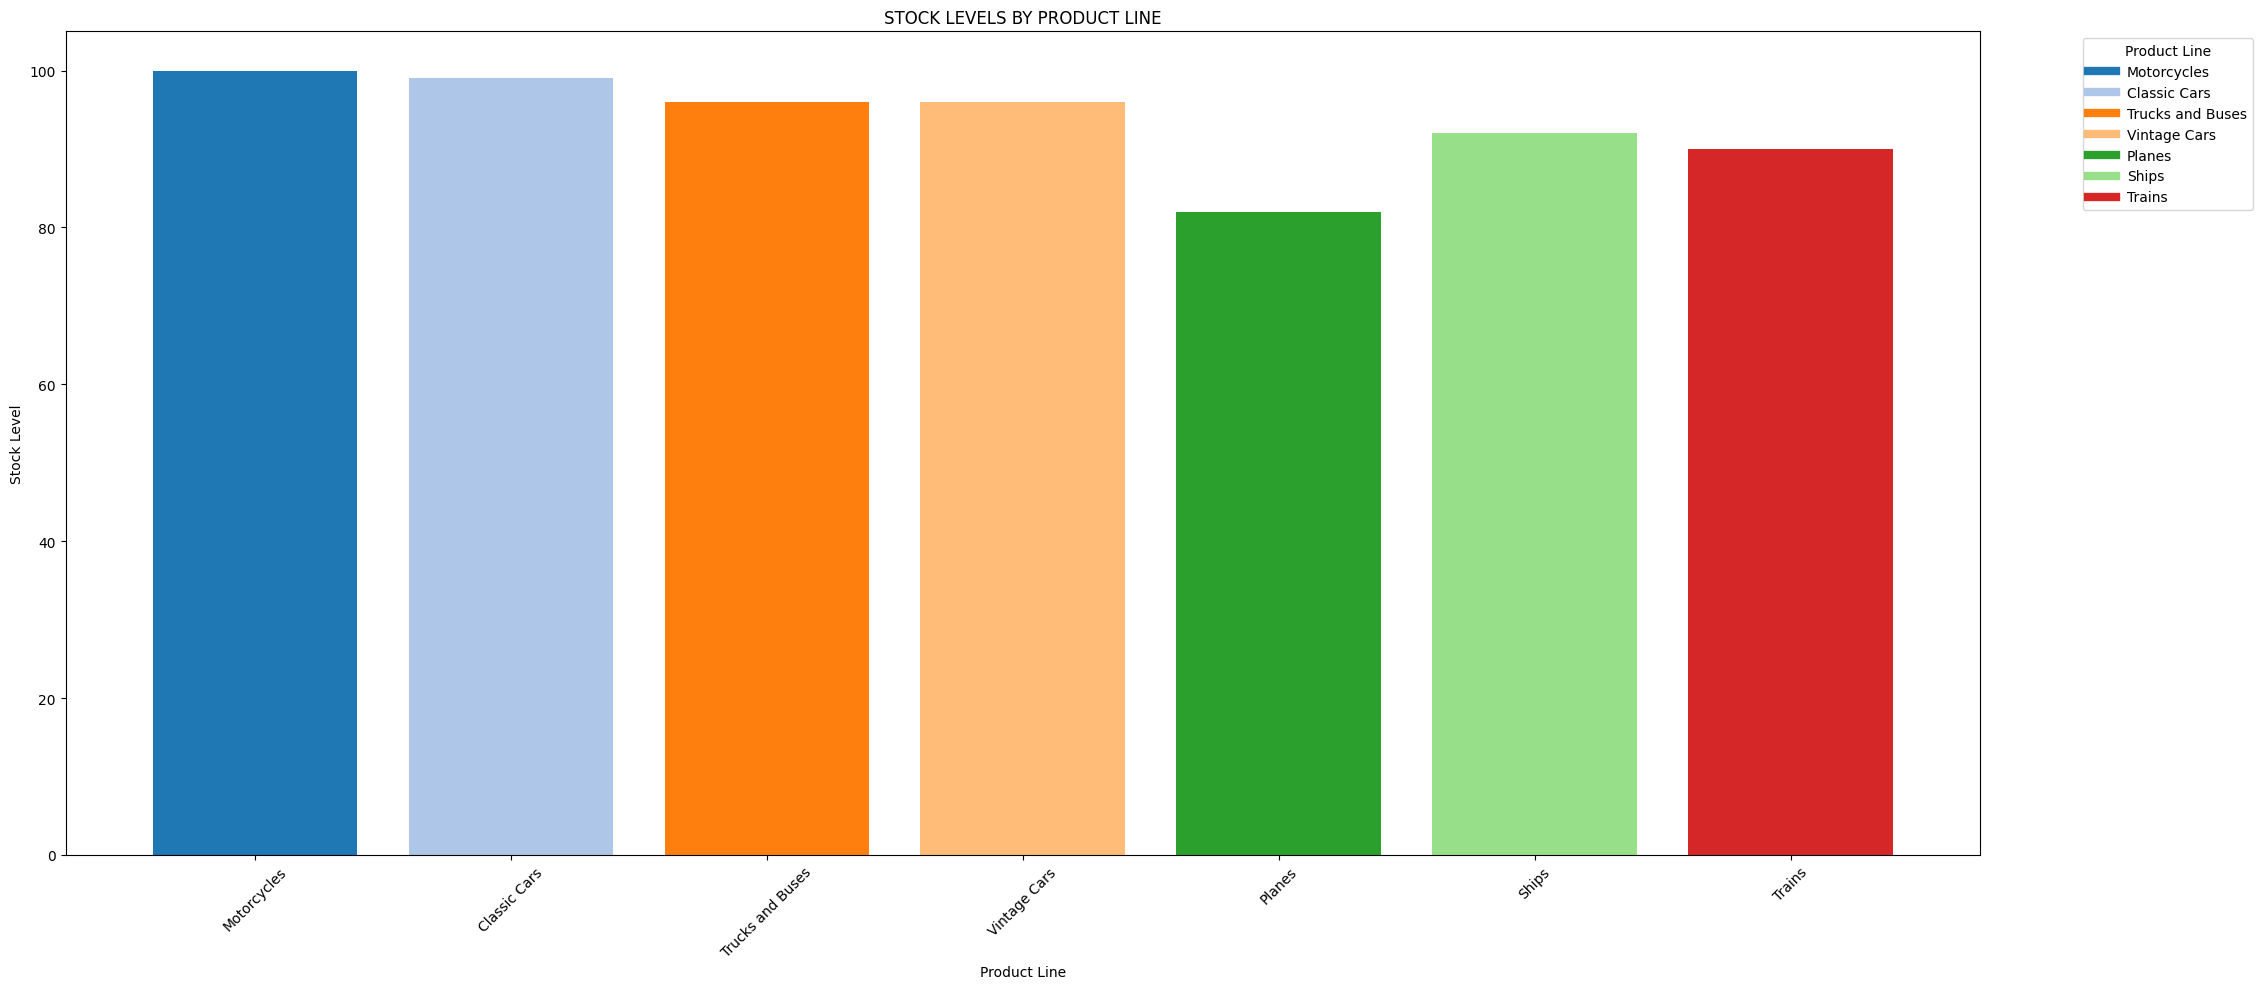

In [16]:
import matplotlib.pyplot as plt

unique_products = inventory_data['PRODUCTLINE'].unique()
color_palette = plt.cm.tab20.colors  # or try tab10, Set3

# Map each product line to a color
color_map = {product: color_palette[i % len(color_palette)] for i, product in enumerate(unique_products)}
bar_colors = inventory_data['PRODUCTLINE'].map(color_map)

plt.figure(figsize=(20, 10))
bars = plt.bar(inventory_data['PRODUCTLINE'], inventory_data['STOCKLEVEL'], color=bar_colors)

plt.title('STOCK LEVELS BY PRODUCT LINE')
plt.xlabel('Product Line')
plt.ylabel('Stock Level')
plt.xticks(rotation=45)
plt.tight_layout()

# Manually add legend
handles = [plt.Line2D([0], [0], color=color_map[product], lw=6) for product in color_map]
labels = list(color_map.keys())
plt.legend(handles, labels, title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Loaded data from C:/Users/USER/Downloads/khensales1.csv
Loaded data from C:/Users/USER/Downloads/kheninventory1.csv
Combined sales and inventory data successfully.


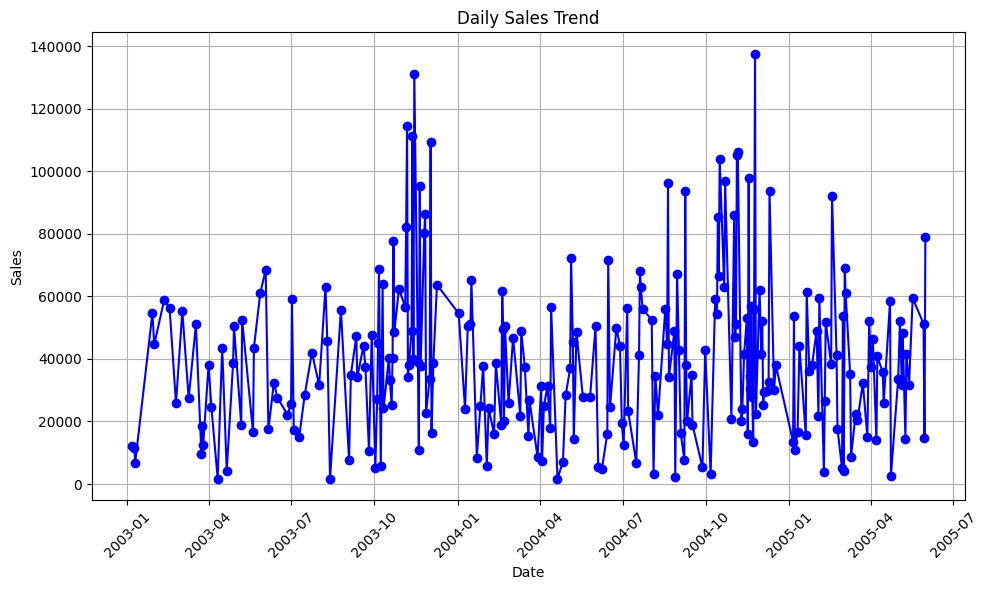

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

# Main function for automating the process
def automate_analysis():
    # Load data
    sales_data = load_data('C:/Users/USER/Downloads/khensales1.csv')
    inventory_data = load_data('C:/Users/USER/Downloads/kheninventory1.csv')

    if sales_data is not None and inventory_data is not None:
        # Combine datasets
        combined_data = combine_sales_inventory(sales_data, inventory_data)
        if combined_data is not None:
            # Perform analysis: Plot sales trend
            plot_sales_trends(combined_data)


# Function to load data from different sources
def load_data(file_path, encoding='utf-8'):
    """
    Load data from a specified file path.
    """
    try:
        data = pd.read_csv(file_path, encoding='Latin1')
        print(f"Loaded data from {file_path}")
        return data
    except Exception as e:
        print(f"Error loading data from {file_path}: {e}")
        return None

# Combine Sales Data and Inventory Data
def combine_sales_inventory(sales_data, inventory_data):
    """
    Combine sales and inventory data on 'PRODUCTCODE'.
    """
    try:
        # Ensure column names match the dataset
        combined_data = pd.merge(sales_data, inventory_data, on='PRODUCTCODE', how='inner')
        print("Combined sales and inventory data successfully.")
        return combined_data
    except KeyError as e:
        print(f"Error: {e} column not found in one of the datasets.")
        return None

# Generate Sales Trend
def plot_sales_trends(data):
    """
    Plot daily sales trends based on the given data.
    """
    try:
        # Check if required columns exist
        if 'ORDERDATE' not in data.columns or 'SALES' not in data.columns:
            print("Error: 'ORDERDATE' or 'SALES' column not found in the dataset.")
            return

        # Ensure 'ORDERDATE' is in datetime format
        data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')
        data = data.dropna(subset=['ORDERDATE'])  # Drop rows with invalid dates

        # Group by date and calculate total sales
        daily_sales = data.groupby('ORDERDATE')['SALES'].sum()

        # Plot sales trends
        plt.figure(figsize=(10, 6))
        plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
        plt.title('Daily Sales Trend')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred while plotting sales trends: {e}")

# Main function for automating the process
def automate_analysis():
    """
    Automate loading, combining, and analyzing data.
    """
    # File paths
    sales_file = 'C:/Users/USER/Downloads/khensales1.csv'
    inventory_file = 'C:/Users/USER/Downloads/kheninventory1.csv'
    

    # Load data
    sales_data = load_data(sales_file)
    inventory_data = load_data(inventory_file)

    if sales_data is not None and inventory_data is not None:
        # Combine datasets
        combined_data = combine_sales_inventory(sales_data, inventory_data)

        if combined_data is not None:
            # Perform analysis: Plot sales trend
            plot_sales_trends(combined_data)

# Automate the process every day
def schedule_automation():
    """
    Schedule the automation process to run every 24 hours.
    """
    try:
        while True:
            print(f"Running automation at {datetime.now()}")
            automate_analysis()
            print("Waiting for the next cycle...")
            time.sleep(86400)  # Wait for 24 hours
    except KeyboardInterrupt:
        print("Automation stopped by user.")

# Example usage
if __name__ == "__main__":
    automate_analysis()
    # Uncomment the line below to enable daily automation
    # schedule_automation()


In [26]:
import pandas as pd
sales_file = 'C:/Users/USER/Downloads/khensales1.csv'
sales_data = pd.read_csv(sales_file,encoding='ISO-8859-1')
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [27]:
import pandas as pd
inventory_file = 'C:/Users/USER/Downloads/kheninventory1.csv'
inventory_data = pd.read_csv(inventory_file,encoding='ISO-8859-1')
inventory_data.head()

,PRODUCTCODE,PRODUCTLINE,STOCKLEVEL,REORDERPOINT,RESTOCKDATE,SUPPLIERNAME,UNITCOST
0,S10_1678,Motorcycles,63,5,12/24/2024,Johnsons,315.43
1,S10_1949,Classic Cars,48,14,1/3/2025,SharksDT,375.62
2,S10_2016,Motorcycles,29,9,12/19/2024,Amerix,372.32
3,S10_4698,Motorcycles,91,18,12/30/2024,Johnsons,12.22
4,S10_4757,Classic Cars,53,13,12/15/2024,Amerix,420.84


In [28]:
print(sales_data.columns)


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [29]:
print(inventory_data.columns)

Index(['PRODUCTCODE', 'PRODUCTLINE', 'STOCKLEVEL', 'REORDERPOINT',
       'RESTOCKDATE', 'SUPPLIERNAME', 'UNITCOST'],
      dtype='object')


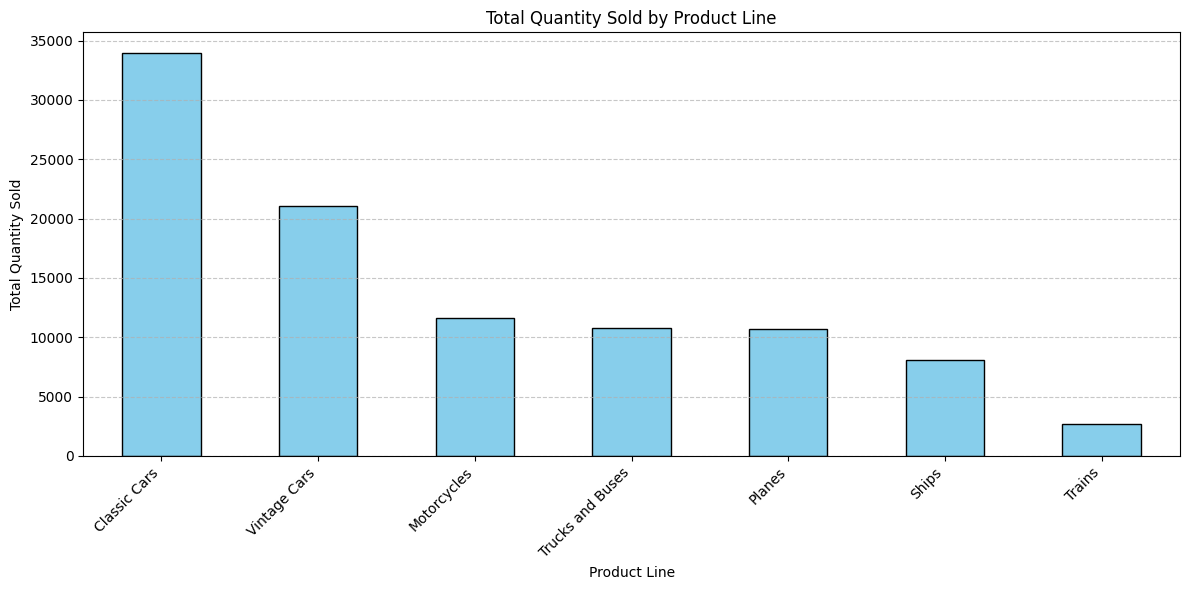


Top 5 Product Lines by Quantity Sold:
PRODUCTLINE
Classic Cars        33992
Vintage Cars        21069
Motorcycles         11663
Trucks and Buses    10777
Planes              10727
Name: QUANTITYORDERED, dtype: int64


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the function FIRST
def product_sales_analysis(data):
    try:
        required_columns = {'PRODUCTLINE', 'QUANTITYORDERED'}
        if not required_columns.issubset(data.columns):
            print(f"Error: Missing columns {required_columns}. Available: {list(data.columns)}")
            return

        data['QUANTITYORDERED'] = pd.to_numeric(data['QUANTITYORDERED'], errors='coerce')
        data = data.dropna(subset=['QUANTITYORDERED'])

        product_sales = data.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)

        plt.figure(figsize=(12, 6))
        product_sales.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Total Quantity Sold by Product Line')
        plt.xlabel('Product Line')
        plt.ylabel('Total Quantity Sold')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        print("\nTop 5 Product Lines by Quantity Sold:")
        print(product_sales.head(5))

    except Exception as e:
        print(f"An error occurred: {e}")

# Load data
sales_file = 'C:/Users/USER/Downloads/khensales1.csv'
inventory_file = 'C:/Users/USER/Downloads/kheninventory1.csv'

sales_data = pd.read_csv(sales_file, encoding='ISO-8859-1')
inventory_data = pd.read_csv(inventory_file, encoding='ISO-8859-1')

sales_data.columns = sales_data.columns.str.upper()
inventory_data.columns = inventory_data.columns.str.upper()

combined_data = pd.merge(sales_data, inventory_data, on='PRODUCTCODE', how='inner')
if 'PRODUCTLINE_x' in combined_data.columns:
    combined_data.rename(columns={'PRODUCTLINE_x': 'PRODUCTLINE'}, inplace=True)
if 'PRODUCTLINE_y' in combined_data.columns:
    combined_data.drop(columns=['PRODUCTLINE_y'], inplace=True)

# Call the function AFTER it's defined
product_sales_analysis(combined_data)


Loaded data from C:/Users/USER/Downloads/khensales1.csv
Loaded data from C:/Users/USER/Downloads/kheninventory1.csv
Combined sales and inventory data successfully.


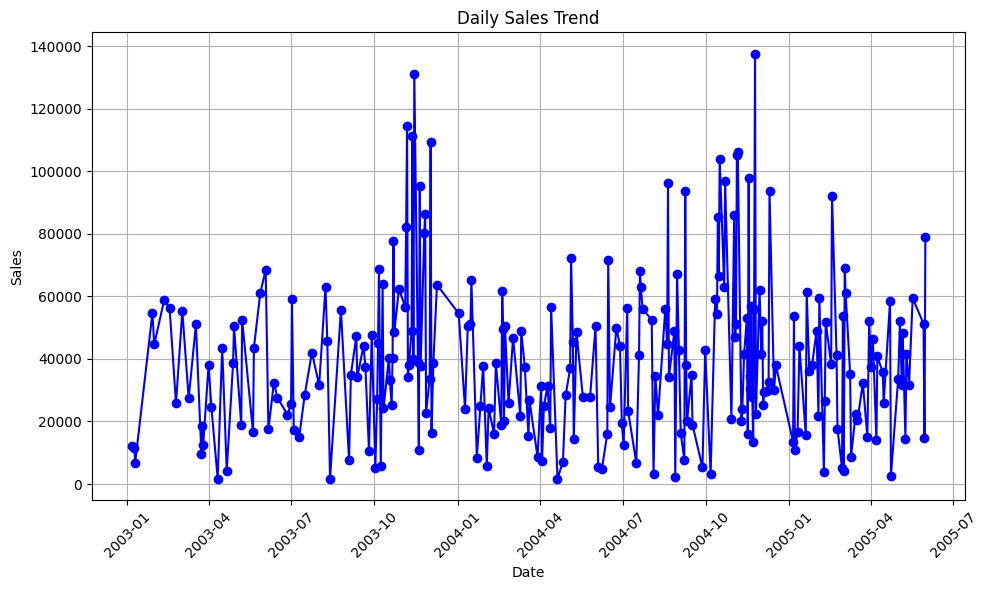

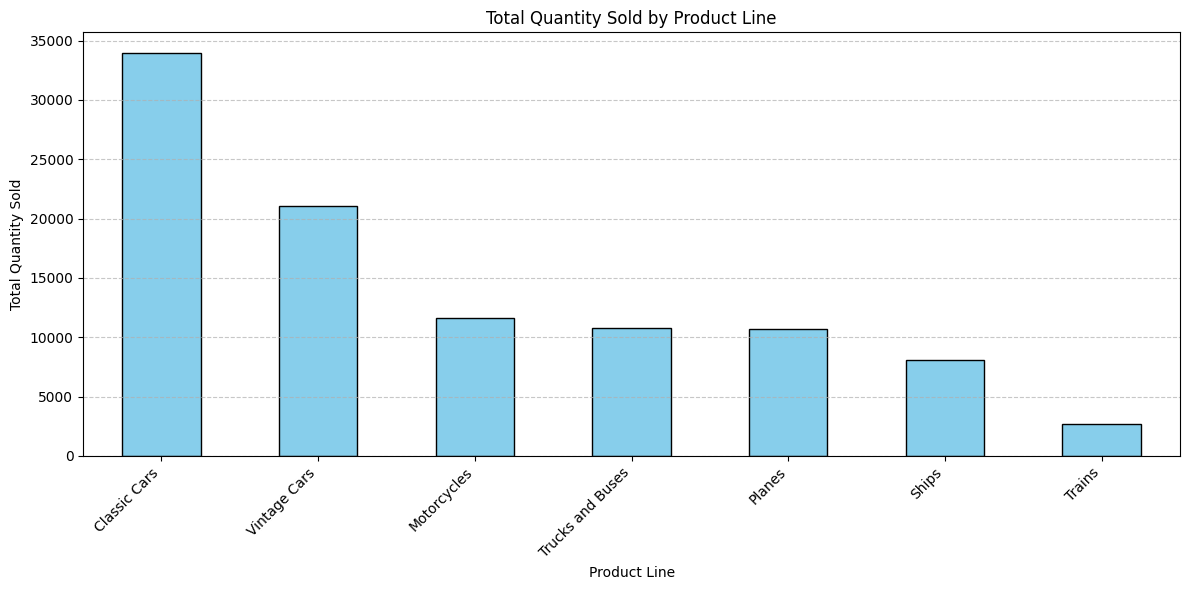


Top 5 Product Lines by Quantity Sold:
PRODUCTLINE
Classic Cars        33992
Vintage Cars        21069
Motorcycles         11663
Trucks and Buses    10777
Planes              10727
Name: QUANTITYORDERED, dtype: int64


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

# Function to load data from different sources
def load_data(file_path):
    """
    Load data from a specified file path.
    """
    try:
        data = pd.read_csv(file_path, encoding='ISO-8859-1')
        print(f"Loaded data from {file_path}")
        
        # Standardize column names
        data.columns = data.columns.str.upper()
        return data
    except Exception as e:
        print(f"Error loading data from {file_path}: {e}")
        return None


# Combine Sales Data and Inventory Data
def combine_sales_inventory(sales_data, inventory_data):
    """
    Combine sales and inventory data on 'PRODUCTCODE' while handling duplicate columns.
    """
    try:
        # Standardize column names
        sales_data.columns = sales_data.columns.str.upper()
        inventory_data.columns = inventory_data.columns.str.upper()

        # Merge datasets on 'PRODUCTCODE'
        combined_data = pd.merge(sales_data, inventory_data, on='PRODUCTCODE', how='inner')

        # Handle duplicate 'PRODUCTLINE' columns
        if 'PRODUCTLINE_x' in combined_data.columns:
            combined_data.rename(columns={'PRODUCTLINE_x': 'PRODUCTLINE'}, inplace=True)
        if 'PRODUCTLINE_y' in combined_data.columns:
            combined_data.drop(columns=['PRODUCTLINE_y'], inplace=True)

        # Ensure 'QUANTITYORDERED' exists
        if 'QUANTITYORDERED' not in combined_data.columns:
            print("Error: 'QUANTITYORDERED' column missing after merging.")
            print("Available columns:", list(combined_data.columns))
            return None

        print("Combined sales and inventory data successfully.")
        return combined_data

    except KeyError as e:
        print(f"Error: {e} column not found in one of the datasets.")
        print("Sales Data Columns:", list(sales_data.columns))
        print("Inventory Data Columns:", list(inventory_data.columns))
        return None



# Generate Sales Trend
def plot_sales_trends(data):
    """
    Plot daily sales trends based on the given data.
    """
    try:
        # Ensure 'ORDERDATE' exists
        if 'ORDERDATE' not in data.columns or 'SALES' not in data.columns:
            print("Error: 'ORDERDATE' or 'SALES' column not found in the dataset.")
            return
        
        # Convert ORDERDATE to datetime
        data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')
        data = data.dropna(subset=['ORDERDATE'])  # Drop invalid dates

        # Group by date and calculate total sales
        daily_sales = data.groupby('ORDERDATE')['SALES'].sum()

        # Plot sales trends
        plt.figure(figsize=(10, 6))
        plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
        plt.title('Daily Sales Trend')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred while plotting sales trends: {e}")

# Function to analyze total quantity sold per product line
def product_sales_analysis(data):
    """
    Analyze and visualize the total quantity of products sold by product line.
    """
    try:
        # Ensure required columns exist
        if 'PRODUCTLINE' not in data.columns or 'QUANTITYORDERED' not in data.columns:
            print("Error: 'PRODUCTLINE' or 'QUANTITYORDERED' column not found in the dataset.")
            return

        # Convert to numeric
        data['QUANTITYORDERED'] = pd.to_numeric(data['QUANTITYORDERED'], errors='coerce')
        data = data.dropna(subset=['QUANTITYORDERED'])

        # Group by product line and sum
        product_sales = data.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)

        # Plot bar chart
        plt.figure(figsize=(12, 6))
        product_sales.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Total Quantity Sold by Product Line')
        plt.xlabel('Product Line')
        plt.ylabel('Total Quantity Sold')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Print summary
        print("\nTop 5 Product Lines by Quantity Sold:")
        print(product_sales.head(5))

    except Exception as e:
        print(f"An error occurred during product sales analysis: {e}")

# Main function for automating the process
def automate_analysis():
    """
    Automate loading, combining, and analyzing data.
    """
    # File paths
    sales_file = 'C:/Users/USER/Downloads/khensales1.csv'
    inventory_file = 'C:/Users/USER/Downloads/kheninventory1.csv'
   
    # Load data
    sales_data = load_data(sales_file)
    inventory_data = load_data(inventory_file)

    if sales_data is not None and inventory_data is not None:
        # Combine datasets
        combined_data = combine_sales_inventory(sales_data, inventory_data)

        if combined_data is not None:
            # Perform analysis: Plot sales trend
            plot_sales_trends(combined_data)

            # Perform product sales analysis
            product_sales_analysis(combined_data)

# Automate the process every day
def schedule_automation():
    """
    Schedule the automation process to run every 24 hours.
    """
    try:
        while True:
            print(f"Running automation at {datetime.now()}")
            automate_analysis()
            print("Waiting for the next cycle...")
            time.sleep(86400)  # Wait for 24 hours
    except KeyboardInterrupt:
        print("Automation stopped by user.")

# Example usage
if __name__ == "__main__":
    automate_analysis()
    # Uncomment the line below to enable daily automation
    # schedule_automation()


### With Monthly Sales Trends and Revenue Growth Rate Analysis

Loaded data from C:/Users/USER/Downloads/khensales1.csv
Loaded data from C:/Users/USER/Downloads/kheninventory1.csv
Combined sales and inventory data successfully.


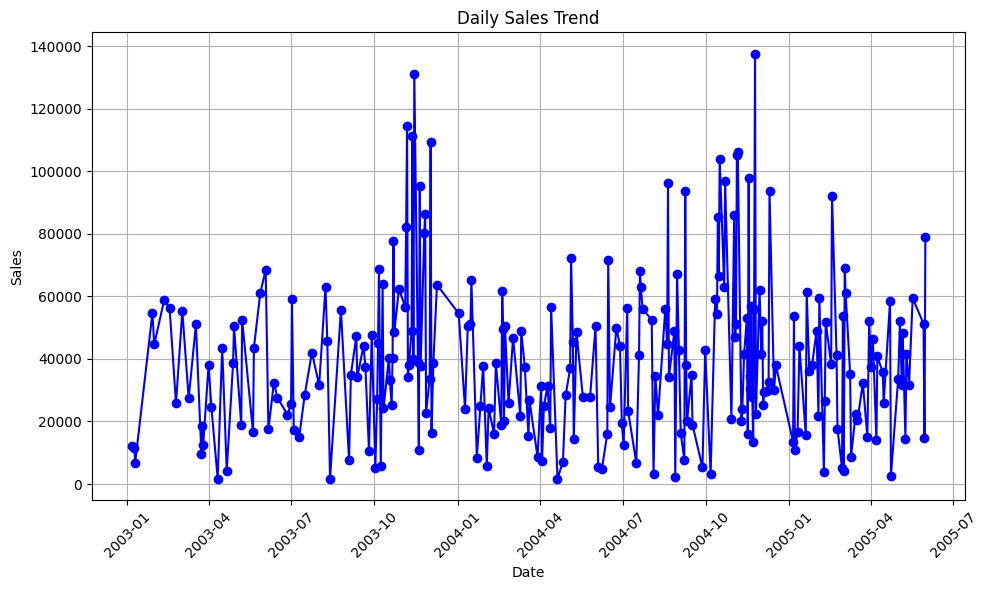

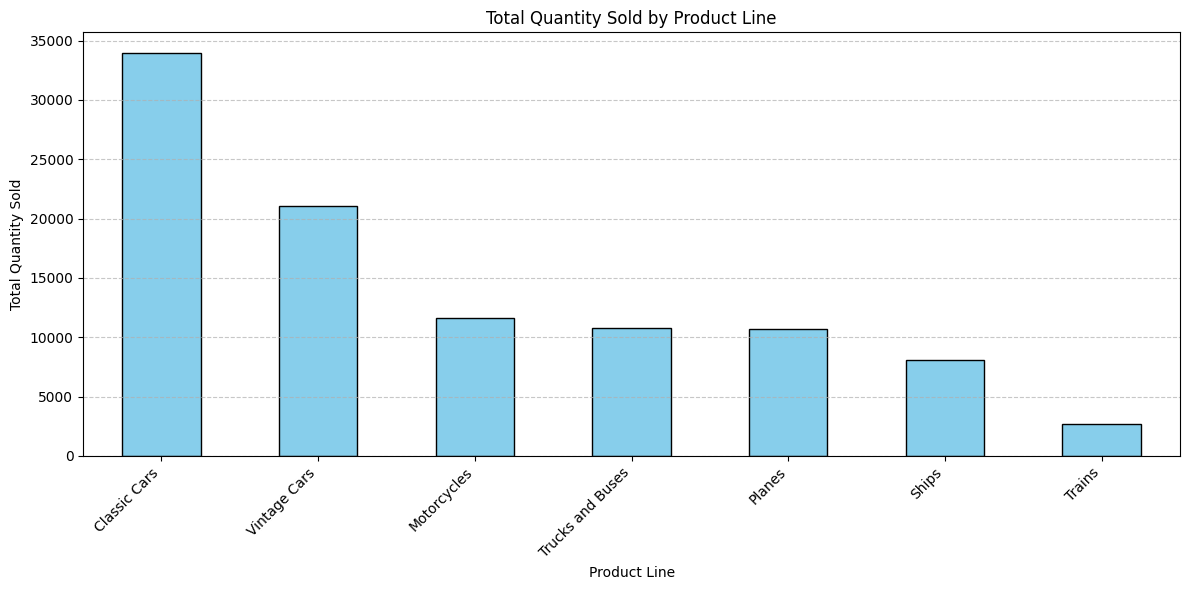


Top 5 Product Lines by Quantity Sold:
PRODUCTLINE
Classic Cars        33992
Vintage Cars        21069
Motorcycles         11663
Trucks and Buses    10777
Planes              10727
Name: QUANTITYORDERED, dtype: int64


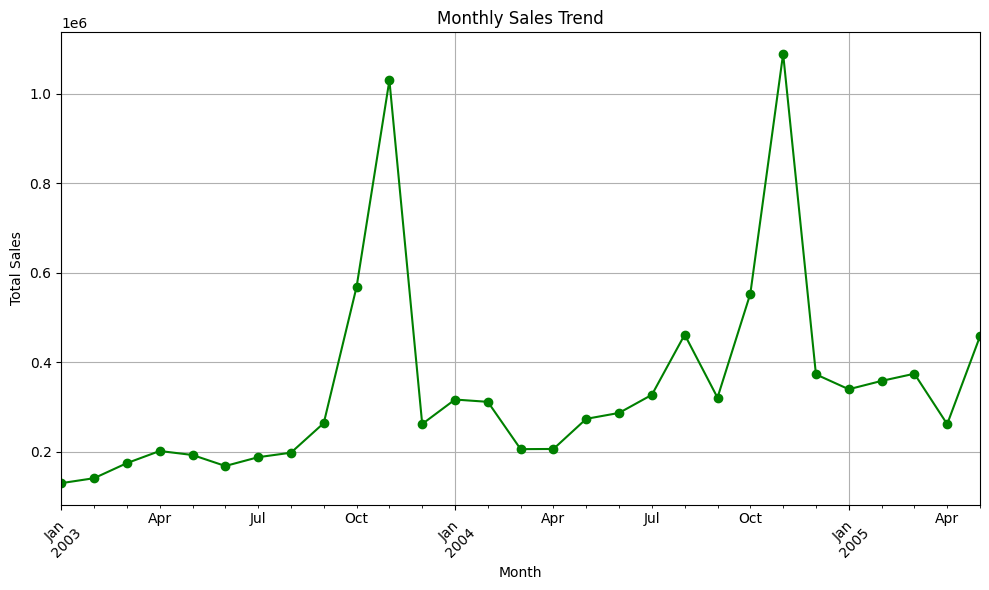


Monthly Sales Summary:
MONTH
2003-01     129753.60
2003-02     140836.19
2003-03     174504.90
2003-04     201609.55
2003-05     192673.11
2003-06     168082.56
2003-07     187731.88
2003-08     197809.30
2003-09     263973.36
2003-10     568290.97
2003-11    1029837.66
2003-12     261876.46
2004-01     316577.42
2004-02     311419.53
2004-03     205733.73
2004-04     206148.12
2004-05     273438.39
2004-06     286674.22
2004-07     327144.09
2004-08     461501.27
2004-09     320750.91
2004-10     552924.25
2004-11    1089048.01
2004-12     372802.66
2005-01     339543.42
2005-02     358186.18
2005-03     374262.76
2005-04     261633.29
2005-05     457861.06
Freq: M, Name: SALES, dtype: float64

Monthly Revenue Growth Rate (%):
MONTH
2003-01      0.00
2003-02      8.54
2003-03     23.91
2003-04     15.53
2003-05     -4.43
2003-06    -12.76
2003-07     11.69
2003-08      5.37
2003-09     33.45
2003-10    115.28
2003-11     81.22
2003-12    -74.57
2004-01     20.89
2004-02     -1.63
200

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

# Function to load data from different sources
def load_data(file_path):
    """
    Load data from a specified file path.
    """
    try:
        data = pd.read_csv(file_path, encoding='Latin1')
        print(f"Loaded data from {file_path}")
        
        # Standardize column names
        data.columns = data.columns.str.upper()
        return data
    except Exception as e:
        print(f"Error loading data from {file_path}: {e}")
        return None

   
    
# Combine Sales Data and Inventory Data
def combine_sales_inventory(sales_data, inventory_data):
    """
    Combine sales and inventory data on 'PRODUCTCODE' while handling duplicate columns.
    """
    try:
        # Standardize column names
        sales_data.columns = sales_data.columns.str.upper()
        inventory_data.columns = inventory_data.columns.str.upper()

        # Merge datasets on 'PRODUCTCODE'
        combined_data = pd.merge(sales_data, inventory_data, on='PRODUCTCODE', how='inner')

        # Handle duplicate 'PRODUCTLINE' columns
        if 'PRODUCTLINE_x' in combined_data.columns:
            combined_data.rename(columns={'PRODUCTLINE_x': 'PRODUCTLINE'}, inplace=True)
        if 'PRODUCTLINE_y' in combined_data.columns:
            combined_data.drop(columns=['PRODUCTLINE_y'], inplace=True)

        # Ensure 'QUANTITYORDERED' exists
        if 'QUANTITYORDERED' not in combined_data.columns:
            print("Error: 'QUANTITYORDERED' column missing after merging.")
            print("Available columns:", list(combined_data.columns))
            return None

        print("Combined sales and inventory data successfully.")
        return combined_data

    except KeyError as e:
        print(f"Error: {e} column not found in one of the datasets.")
        print("Sales Data Columns:", list(sales_data.columns))
        print("Inventory Data Columns:", list(inventory_data.columns))
        return None



# Generate Sales Trend
def plot_sales_trends(data):
    """
    Plot daily sales trends based on the given data.
    """
    try:
        # Ensure 'ORDERDATE' exists
        if 'ORDERDATE' not in data.columns or 'SALES' not in data.columns:
            print("Error: 'ORDERDATE' or 'SALES' column not found in the dataset.")
            return
        
        # Convert ORDERDATE to datetime
        data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')
        data = data.dropna(subset=['ORDERDATE'])  # Drop invalid dates

        # Group by date and calculate total sales
        daily_sales = data.groupby('ORDERDATE')['SALES'].sum()

        # Plot sales trends
        plt.figure(figsize=(10, 6))
        plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
        plt.title('Daily Sales Trend')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred while plotting sales trends: {e}")

# Function to analyze total quantity sold per product line
def product_sales_analysis(data):
    """
    Analyze and visualize the total quantity of products sold by product line.
    """
    try:
        # Ensure required columns exist
        if 'PRODUCTLINE' not in data.columns or 'QUANTITYORDERED' not in data.columns:
            print("Error: 'PRODUCTLINE' or 'QUANTITYORDERED' column not found in the dataset.")
            return

        # Convert to numeric
        data['QUANTITYORDERED'] = pd.to_numeric(data['QUANTITYORDERED'], errors='coerce')
        data = data.dropna(subset=['QUANTITYORDERED'])

        # Group by product line and sum
        product_sales = data.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)

        # Plot bar chart
        plt.figure(figsize=(12, 6))
        product_sales.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Total Quantity Sold by Product Line')
        plt.xlabel('Product Line')
        plt.ylabel('Total Quantity Sold')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Print summary
        print("\nTop 5 Product Lines by Quantity Sold:")
        print(product_sales.head(5))

    except Exception as e:
        print(f"An error occurred during product sales analysis: {e}")
        
def plot_monthly_sales(data):
    """
    Plot monthly sales trends based on 'ORDERDATE' and 'SALES'.
    """
    try:
        data['MONTH'] = data['ORDERDATE'].dt.to_period('M')  # Converts to "2023-07", etc.
        monthly_sales = data.groupby('MONTH')['SALES'].sum()

        # Plot
        plt.figure(figsize=(10, 6))
        monthly_sales.plot(kind='line', marker='o', color='green')
        plt.title('Monthly Sales Trend')
        plt.xlabel('Month')
        plt.ylabel('Total Sales')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print("\nMonthly Sales Summary:")
        print(monthly_sales)
    except Exception as e:
        print(f"Error in monthly sales trend analysis: {e}")

        
def revenue_growth_rate(data):
    """
    Calculate and print the month-over-month revenue growth rate.
    """
    try:
        data['MONTH'] = data['ORDERDATE'].dt.to_period('M')
        monthly_sales = data.groupby('MONTH')['SALES'].sum()

        # Month-over-month % growth
        growth_rate = monthly_sales.pct_change().fillna(0) * 100

        print("\nMonthly Revenue Growth Rate (%):")
        print(growth_rate.round(2))  # Rounded for readability
    except Exception as e:
        print(f"Error calculating revenue growth: {e}")

        

# Main function for automating the process
def automate_analysis():
    """
    Automate loading, combining, and analyzing data.
    """
    # File paths
    sales_file = 'C:/Users/USER/Downloads/khensales1.csv'
    inventory_file = 'C:/Users/USER/Downloads/kheninventory1.csv'
   
    # Load data
    sales_data = load_data(sales_file)
    inventory_data = load_data(inventory_file)

    if sales_data is not None and inventory_data is not None:
        # Combine datasets
        combined_data = combine_sales_inventory(sales_data, inventory_data)

        if combined_data is not None:
            # Perform analysis: Plot sales trend
            plot_sales_trends(combined_data)

            # Perform product sales analysis
            product_sales_analysis(combined_data)
            
            
            
def automate_analysis():
    """
    Automate loading, combining, and analyzing data.
    """
    # File paths
    sales_file = 'C:/Users/USER/Downloads/khensales1.csv'
    inventory_file = 'C:/Users/USER/Downloads/kheninventory1.csv'
   
    # Load data
    sales_data = load_data(sales_file)
    inventory_data = load_data(inventory_file)

    if sales_data is not None and inventory_data is not None:
        # Combine datasets
        combined_data = combine_sales_inventory(sales_data, inventory_data)

        if combined_data is not None:
            # Convert ORDERDATE to datetime
            combined_data['ORDERDATE'] = pd.to_datetime(combined_data['ORDERDATE'], errors='coerce')
            combined_data = combined_data.dropna(subset=['ORDERDATE'])

            # Perform all analyses
            plot_sales_trends(combined_data)
            product_sales_analysis(combined_data)
            plot_monthly_sales(combined_data)
            revenue_growth_rate(combined_data)
            
automate_analysis()
    # Uncomment the line below to enable daily automation
    # schedule_automation()            
   
   
    

### With Anomaly detection

Loaded data from C:/Users/USER/Downloads/khensales1.csv
Loaded data from C:/Users/USER/Downloads/kheninventory1.csv
Combined sales and inventory data successfully.


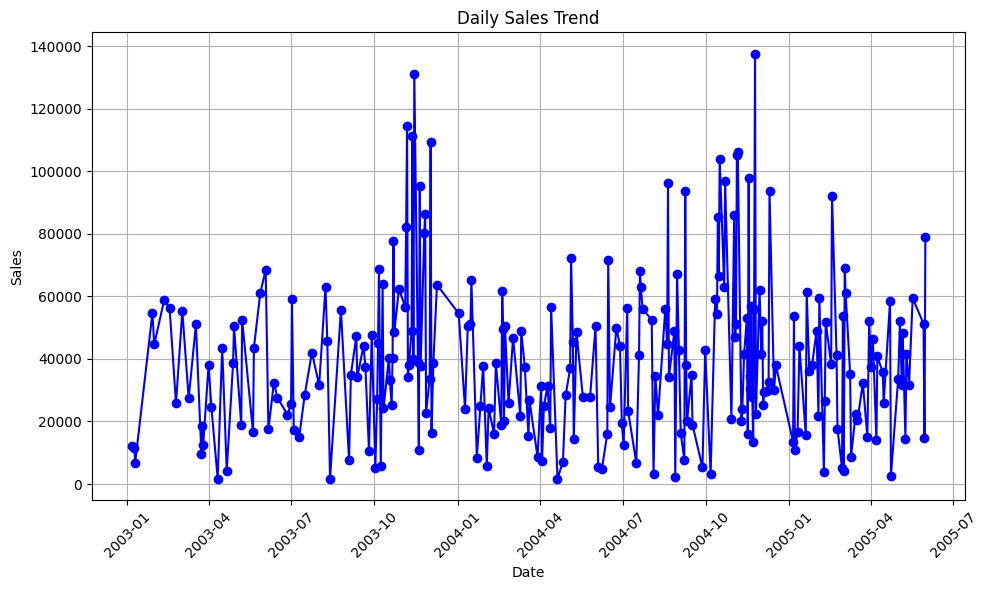

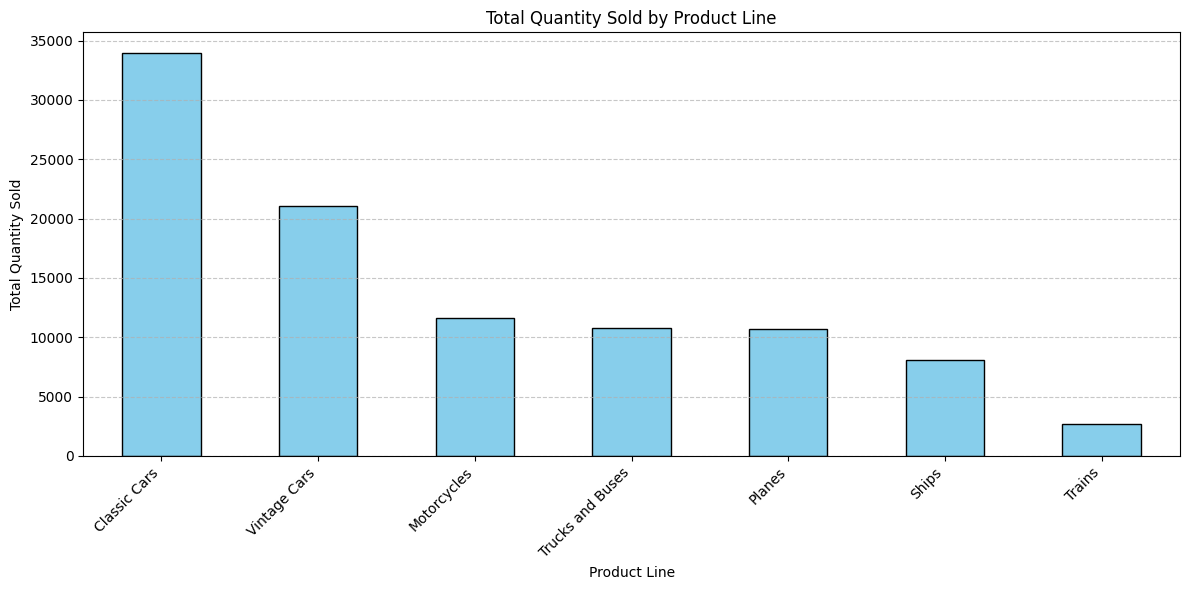


Top 5 Product Lines by Quantity Sold:
PRODUCTLINE
Classic Cars        33992
Vintage Cars        21069
Motorcycles         11663
Trucks and Buses    10777
Planes              10727
Name: QUANTITYORDERED, dtype: int64


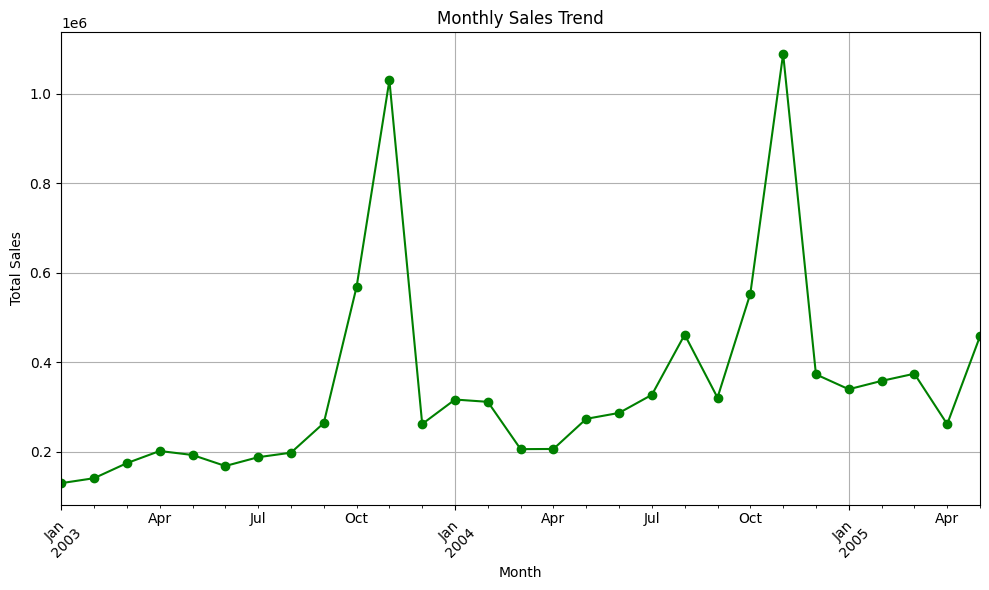


Monthly Sales Summary:
MONTH
2003-01     129753.60
2003-02     140836.19
2003-03     174504.90
2003-04     201609.55
2003-05     192673.11
2003-06     168082.56
2003-07     187731.88
2003-08     197809.30
2003-09     263973.36
2003-10     568290.97
2003-11    1029837.66
2003-12     261876.46
2004-01     316577.42
2004-02     311419.53
2004-03     205733.73
2004-04     206148.12
2004-05     273438.39
2004-06     286674.22
2004-07     327144.09
2004-08     461501.27
2004-09     320750.91
2004-10     552924.25
2004-11    1089048.01
2004-12     372802.66
2005-01     339543.42
2005-02     358186.18
2005-03     374262.76
2005-04     261633.29
2005-05     457861.06
Freq: M, Name: SALES, dtype: float64

Monthly Revenue Growth Rate (%):
MONTH
2003-01      0.00
2003-02      8.54
2003-03     23.91
2003-04     15.53
2003-05     -4.43
2003-06    -12.76
2003-07     11.69
2003-08      5.37
2003-09     33.45
2003-10    115.28
2003-11     81.22
2003-12    -74.57
2004-01     20.89
2004-02     -1.63
200

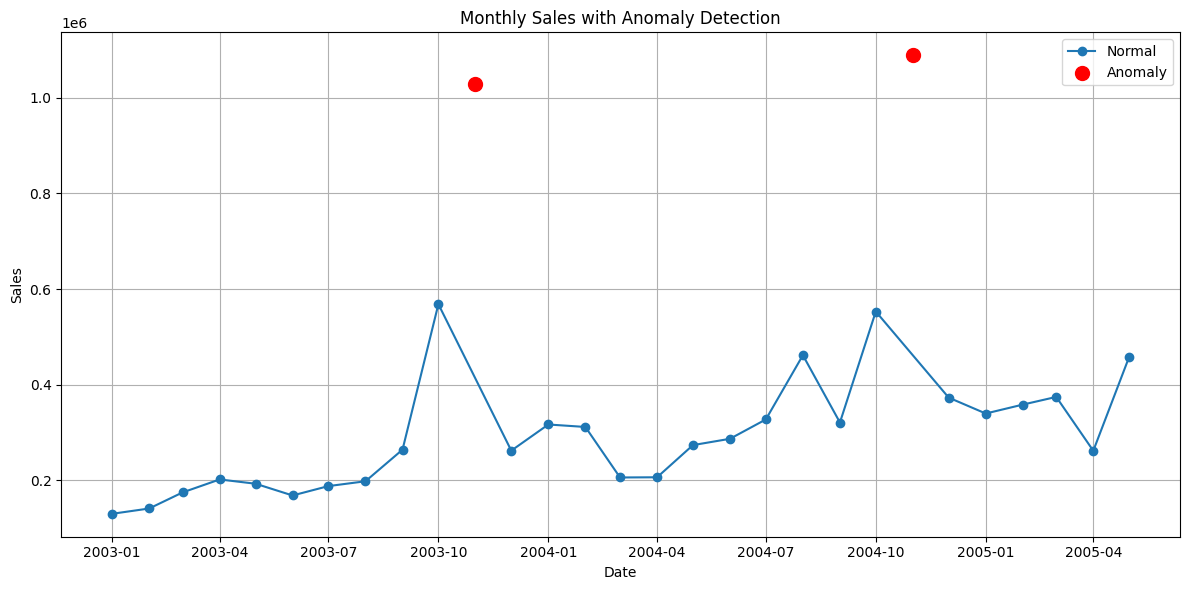


Detected Sales Anomalies:
         DATE       SALES   Z_SCORE  ANOMALY
10 2003-11-01  1029837.66  3.055448  Anomaly
22 2004-11-01  1089048.01  3.319987  Anomaly


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from datetime import datetime

# Function to load data from different sources
def load_data(file_path):
    try:
        data = pd.read_csv(file_path, encoding='Latin1')
        print(f"Loaded data from {file_path}")
        data.columns = data.columns.str.upper()
        return data
    except Exception as e:
        print(f"Error loading data from {file_path}: {e}")
        return None

# Combine Sales Data and Inventory Data
def combine_sales_inventory(sales_data, inventory_data):
    try:
        sales_data.columns = sales_data.columns.str.upper()
        inventory_data.columns = inventory_data.columns.str.upper()

        combined_data = pd.merge(sales_data, inventory_data, on='PRODUCTCODE', how='inner')

        if 'PRODUCTLINE_x' in combined_data.columns:
            combined_data.rename(columns={'PRODUCTLINE_x': 'PRODUCTLINE'}, inplace=True)
        if 'PRODUCTLINE_y' in combined_data.columns:
            combined_data.drop(columns=['PRODUCTLINE_y'], inplace=True)

        if 'QUANTITYORDERED' not in combined_data.columns:
            print("Error: 'QUANTITYORDERED' column missing after merging.")
            print("Available columns:", list(combined_data.columns))
            return None

        print("Combined sales and inventory data successfully.")
        return combined_data
    except KeyError as e:
        print(f"Error: {e} column not found in one of the datasets.")
        return None

# Plot daily sales trend
def plot_sales_trends(data):
    try:
        if 'ORDERDATE' not in data.columns or 'SALES' not in data.columns:
            print("Error: 'ORDERDATE' or 'SALES' column not found in the dataset.")
            return

        data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')
        data = data.dropna(subset=['ORDERDATE'])

        daily_sales = data.groupby('ORDERDATE')['SALES'].sum()

        plt.figure(figsize=(10, 6))
        plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
        plt.title('Daily Sales Trend')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred while plotting sales trends: {e}")

# Analyze product sales by product line
def product_sales_analysis(data):
    try:
        if 'PRODUCTLINE' not in data.columns or 'QUANTITYORDERED' not in data.columns:
            print("Error: 'PRODUCTLINE' or 'QUANTITYORDERED' column not found in the dataset.")
            return

        data['QUANTITYORDERED'] = pd.to_numeric(data['QUANTITYORDERED'], errors='coerce')
        data = data.dropna(subset=['QUANTITYORDERED'])

        product_sales = data.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)

        plt.figure(figsize=(12, 6))
        product_sales.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Total Quantity Sold by Product Line')
        plt.xlabel('Product Line')
        plt.ylabel('Total Quantity Sold')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        print("\nTop 5 Product Lines by Quantity Sold:")
        print(product_sales.head(5))
    except Exception as e:
        print(f"An error occurred during product sales analysis: {e}")

# Monthly sales trend
def plot_monthly_sales(data):
    try:
        data['MONTH'] = data['ORDERDATE'].dt.to_period('M')
        monthly_sales = data.groupby('MONTH')['SALES'].sum()

        plt.figure(figsize=(10, 6))
        monthly_sales.plot(kind='line', marker='o', color='green')
        plt.title('Monthly Sales Trend')
        plt.xlabel('Month')
        plt.ylabel('Total Sales')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print("\nMonthly Sales Summary:")
        print(monthly_sales)
    except Exception as e:
        print(f"Error in monthly sales trend analysis: {e}")

# Revenue growth rate
def revenue_growth_rate(data):
    try:
        data['MONTH'] = data['ORDERDATE'].dt.to_period('M')
        monthly_sales = data.groupby('MONTH')['SALES'].sum()
        growth_rate = monthly_sales.pct_change().fillna(0) * 100
        print("\nMonthly Revenue Growth Rate (%):")
        print(growth_rate.round(2))
    except Exception as e:
        print(f"Error calculating revenue growth: {e}")

# Anomaly Detection
def detect_sales_anomalies(data):
    try:
        data['MONTH'] = data['ORDERDATE'].dt.to_period('M').dt.to_timestamp()
        monthly_sales = data.groupby('MONTH')['SALES'].sum().reset_index()
        monthly_sales.columns = ['DATE', 'SALES']
        monthly_sales['Z_SCORE'] = zscore(monthly_sales['SALES'])
        monthly_sales['ANOMALY'] = monthly_sales['Z_SCORE'].apply(lambda x: 'Anomaly' if abs(x) > 2 else 'Normal')

        plt.figure(figsize=(12, 6))
        normal = monthly_sales[monthly_sales['ANOMALY'] == 'Normal']
        anomaly = monthly_sales[monthly_sales['ANOMALY'] == 'Anomaly']

        plt.plot(normal['DATE'], normal['SALES'], label='Normal', marker='o')
        plt.scatter(anomaly['DATE'], anomaly['SALES'], color='red', label='Anomaly', s=100)
        plt.title('Monthly Sales with Anomaly Detection')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print("\nDetected Sales Anomalies:")
        print(monthly_sales[monthly_sales['ANOMALY'] == 'Anomaly'])
    except Exception as e:
        print(f"Error in anomaly detection: {e}")

# Main function
def automate_analysis():
    sales_file = 'C:/Users/USER/Downloads/khensales1.csv'
    inventory_file = 'C:/Users/USER/Downloads/kheninventory1.csv'

    sales_data = load_data(sales_file)
    inventory_data = load_data(inventory_file)

    if sales_data is not None and inventory_data is not None:
        combined_data = combine_sales_inventory(sales_data, inventory_data)

        if combined_data is not None:
            combined_data['ORDERDATE'] = pd.to_datetime(combined_data['ORDERDATE'], errors='coerce')
            combined_data = combined_data.dropna(subset=['ORDERDATE'])

            plot_sales_trends(combined_data)
            product_sales_analysis(combined_data)
            plot_monthly_sales(combined_data)
            revenue_growth_rate(combined_data)
            detect_sales_anomalies(combined_data)

# Run automation
automate_analysis()


## SALES FORECASTING

In [ ]:
# Prophet-based Sales Forecasting 

from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Function to prepare monthly data for forecasting
def prepare_monthly_forecast_data(data):
    data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')
    data.dropna(subset=['ORDERDATE'], inplace=True)

    data['MONTH'] = data['ORDERDATE'].dt.to_period('M').dt.to_timestamp()
    monthly_sales = data.groupby('MONTH')['SALES'].sum().reset_index()
    monthly_sales.columns = ['ds', 'y']  # Prophet expects these column names
    return monthly_sales

# Function to forecast future sales
def forecast_sales(data, periods=6):
    monthly_data = prepare_monthly_forecast_data(data)

    model = Prophet()
    model.fit(monthly_data)

    future = model.make_future_dataframe(periods=periods, freq='M')
    forecast = model.predict(future)

    # Plot forecast
    fig1 = model.plot(forecast)
    plt.title('Sales Forecast with Prophet')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Optional: Show forecast table
    forecast_summary = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(periods)
    print("\nForecasted Sales for Next", periods, "Months:")
    print(forecast_summary)

# Example: Add this to your automate_analysis function or run it separately
# forecast_sales(combined_data)  # Use this after your data has been merged and cleaned


Loaded data from C:/Users/USER/Downloads/khensales1.csv
Loaded data from C:/Users/USER/Downloads/kheninventory1.csv
Combined sales and inventory data successfully.


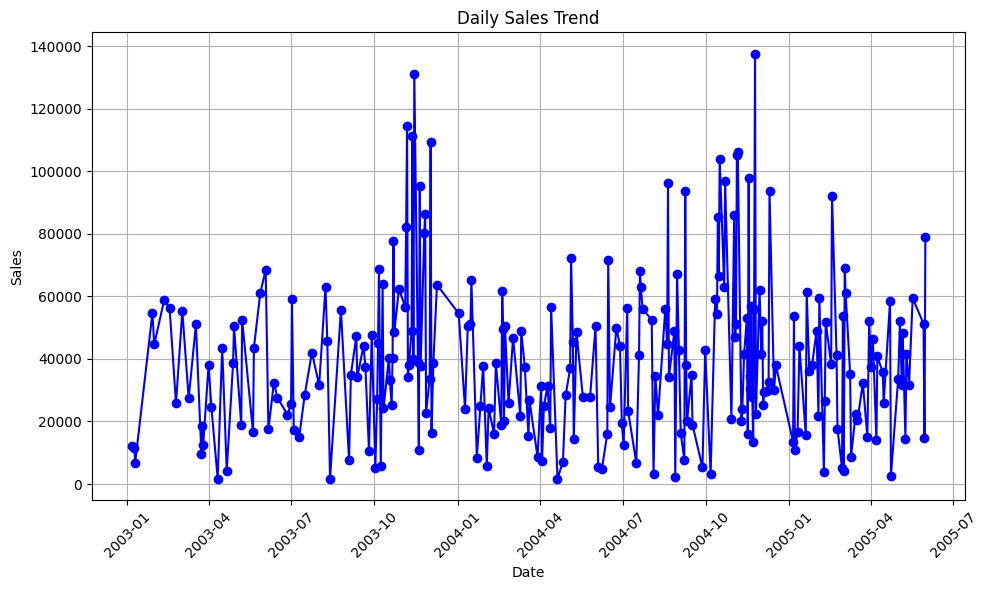

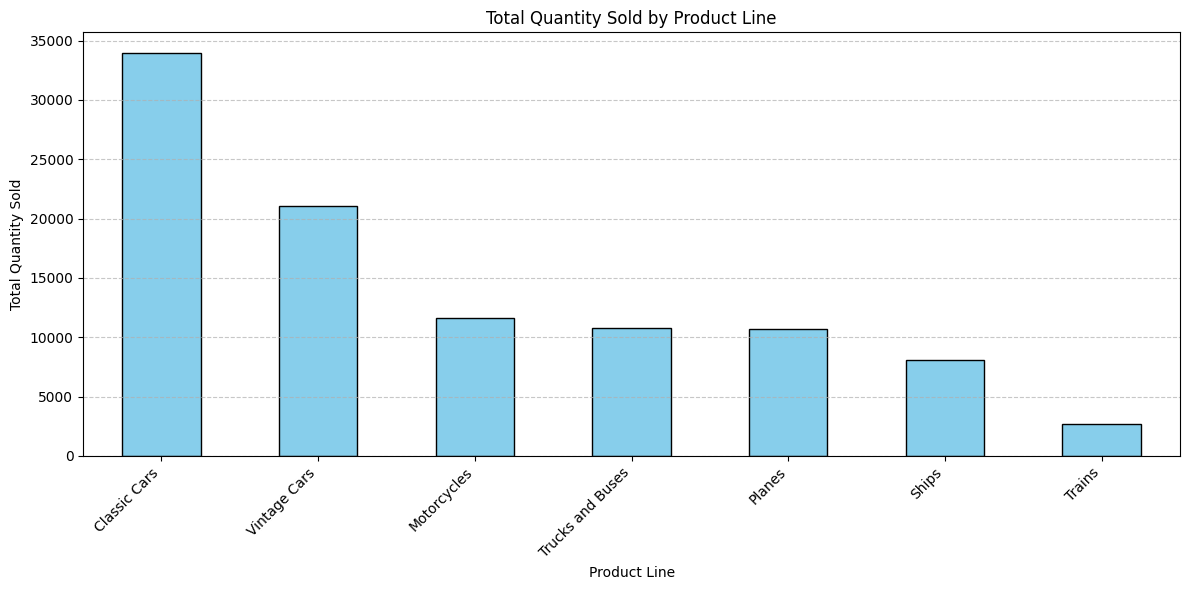


Top 5 Product Lines by Quantity Sold:
PRODUCTLINE
Classic Cars        33992
Vintage Cars        21069
Motorcycles         11663
Trucks and Buses    10777
Planes              10727
Name: QUANTITYORDERED, dtype: int64


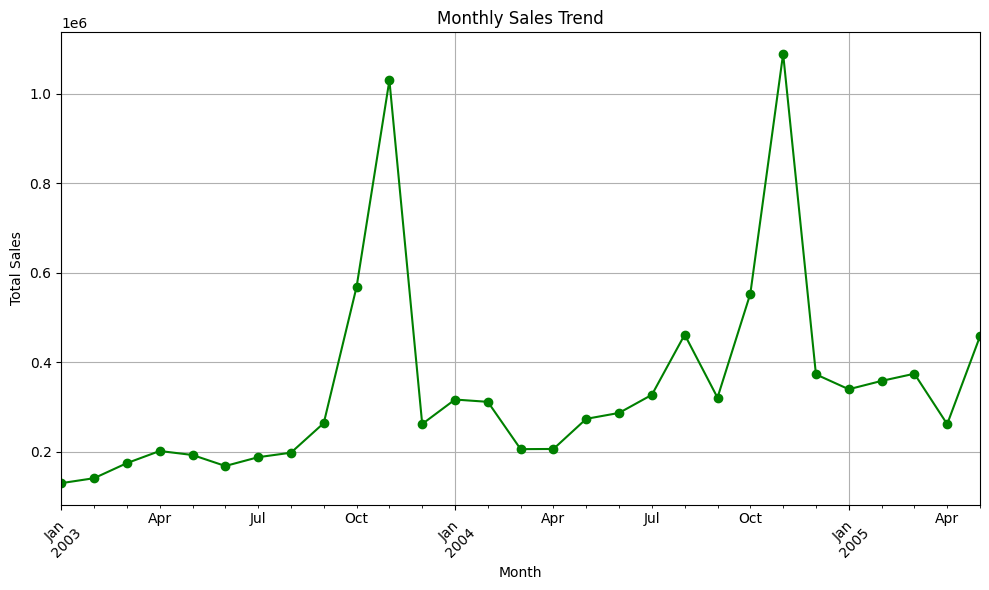


Monthly Sales Summary:
MONTH
2003-01     129753.60
2003-02     140836.19
2003-03     174504.90
2003-04     201609.55
2003-05     192673.11
2003-06     168082.56
2003-07     187731.88
2003-08     197809.30
2003-09     263973.36
2003-10     568290.97
2003-11    1029837.66
2003-12     261876.46
2004-01     316577.42
2004-02     311419.53
2004-03     205733.73
2004-04     206148.12
2004-05     273438.39
2004-06     286674.22
2004-07     327144.09
2004-08     461501.27
2004-09     320750.91
2004-10     552924.25
2004-11    1089048.01
2004-12     372802.66
2005-01     339543.42
2005-02     358186.18
2005-03     374262.76
2005-04     261633.29
2005-05     457861.06
Freq: M, Name: SALES, dtype: float64

Monthly Revenue Growth Rate (%):
MONTH
2003-01      0.00
2003-02      8.54
2003-03     23.91
2003-04     15.53
2003-05     -4.43
2003-06    -12.76
2003-07     11.69
2003-08      5.37
2003-09     33.45
2003-10    115.28
2003-11     81.22
2003-12    -74.57
2004-01     20.89
2004-02     -1.63
200

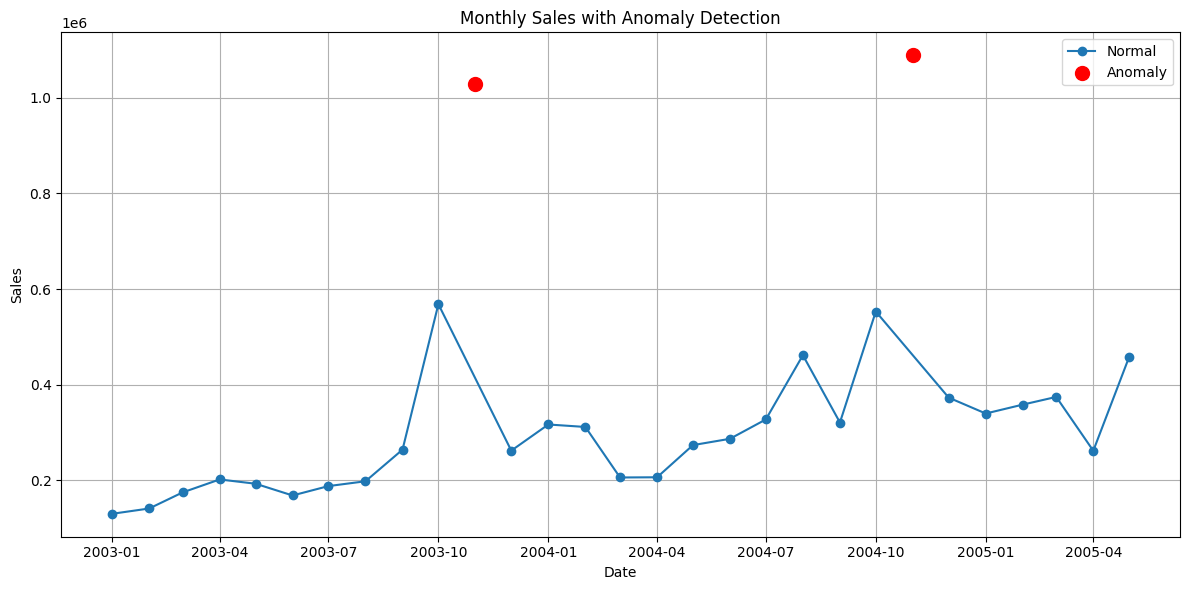


Detected Sales Anomalies:
         DATE       SALES   Z_SCORE  ANOMALY
10 2003-11-01  1029837.66  3.055448  Anomaly
22 2004-11-01  1089048.01  3.319987  Anomaly


13:27:01 - cmdstanpy - INFO - Chain [1] start processing
13:27:08 - cmdstanpy - INFO - Chain [1] done processing


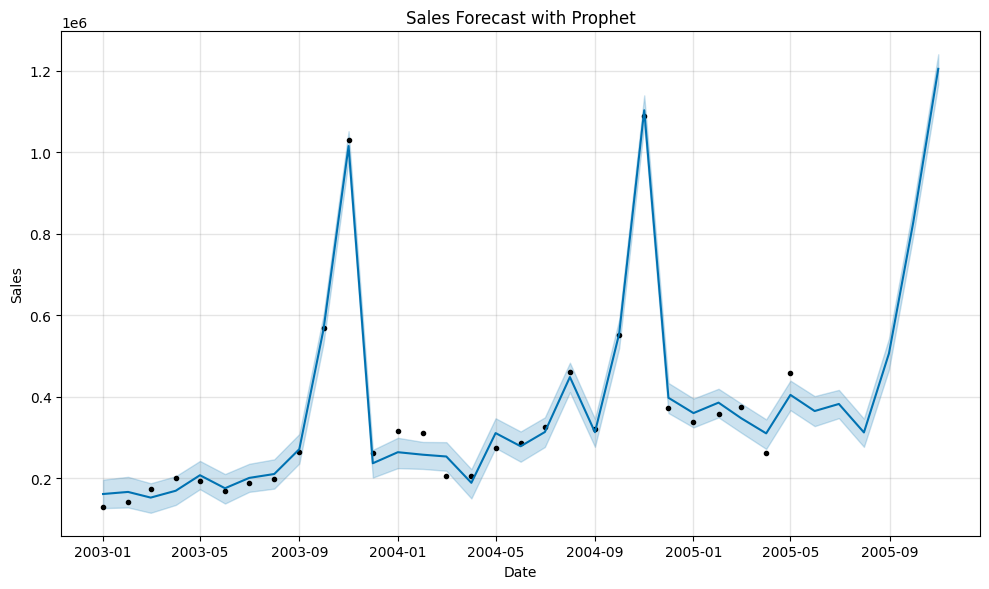


Forecasted Sales:
           ds          yhat    yhat_lower    yhat_upper
29 2005-05-31  3.652367e+05  3.281659e+05  4.018838e+05
30 2005-06-30  3.825898e+05  3.476848e+05  4.171679e+05
31 2005-07-31  3.127106e+05  2.772513e+05  3.464412e+05
32 2005-08-31  5.067323e+05  4.669536e+05  5.432825e+05
33 2005-09-30  8.275809e+05  7.941355e+05  8.662127e+05
34 2005-10-31  1.205186e+06  1.167811e+06  1.240938e+06


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from datetime import datetime
from prophet import Prophet

# Function to load data from different sources
def load_data(file_path):
    try:
        data = pd.read_csv(file_path, encoding='Latin1')
        print(f"Loaded data from {file_path}")
        data.columns = data.columns.str.upper()
        return data
    except Exception as e:
        print(f"Error loading data from {file_path}: {e}")
        return None

# Combine Sales Data and Inventory Data
def combine_sales_inventory(sales_data, inventory_data):
    try:
        sales_data.columns = sales_data.columns.str.upper()
        inventory_data.columns = inventory_data.columns.str.upper()

        combined_data = pd.merge(sales_data, inventory_data, on='PRODUCTCODE', how='inner')

        if 'PRODUCTLINE_x' in combined_data.columns:
            combined_data.rename(columns={'PRODUCTLINE_x': 'PRODUCTLINE'}, inplace=True)
        if 'PRODUCTLINE_y' in combined_data.columns:
            combined_data.drop(columns=['PRODUCTLINE_y'], inplace=True)

        if 'QUANTITYORDERED' not in combined_data.columns:
            print("Error: 'QUANTITYORDERED' column missing after merging.")
            return None

        print("Combined sales and inventory data successfully.")
        return combined_data
    except KeyError as e:
        print(f"Error: {e} column not found in one of the datasets.")
        return None

# Plot daily sales trend
def plot_sales_trends(data):
    try:
        if 'ORDERDATE' not in data.columns or 'SALES' not in data.columns:
            print("Error: 'ORDERDATE' or 'SALES' column not found in the dataset.")
            return

        data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')
        data = data.dropna(subset=['ORDERDATE'])

        daily_sales = data.groupby('ORDERDATE')['SALES'].sum()

        plt.figure(figsize=(10, 6))
        plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
        plt.title('Daily Sales Trend')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred while plotting sales trends: {e}")

# Analyze product sales by product line
def product_sales_analysis(data):
    try:
        if 'PRODUCTLINE' not in data.columns or 'QUANTITYORDERED' not in data.columns:
            print("Error: 'PRODUCTLINE' or 'QUANTITYORDERED' column not found in the dataset.")
            return

        data['QUANTITYORDERED'] = pd.to_numeric(data['QUANTITYORDERED'], errors='coerce')
        data = data.dropna(subset=['QUANTITYORDERED'])

        product_sales = data.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().sort_values(ascending=False)

        plt.figure(figsize=(12, 6))
        product_sales.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Total Quantity Sold by Product Line')
        plt.xlabel('Product Line')
        plt.ylabel('Total Quantity Sold')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        print("\nTop 5 Product Lines by Quantity Sold:")
        print(product_sales.head(5))
    except Exception as e:
        print(f"An error occurred during product sales analysis: {e}")

# Monthly sales trend
def plot_monthly_sales(data):
    try:
        data['MONTH'] = data['ORDERDATE'].dt.to_period('M')
        monthly_sales = data.groupby('MONTH')['SALES'].sum()

        plt.figure(figsize=(10, 6))
        monthly_sales.plot(kind='line', marker='o', color='green')
        plt.title('Monthly Sales Trend')
        plt.xlabel('Month')
        plt.ylabel('Total Sales')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print("\nMonthly Sales Summary:")
        print(monthly_sales)
    except Exception as e:
        print(f"Error in monthly sales trend analysis: {e}")

# Revenue growth rate
def revenue_growth_rate(data):
    try:
        data['MONTH'] = data['ORDERDATE'].dt.to_period('M')
        monthly_sales = data.groupby('MONTH')['SALES'].sum()
        growth_rate = monthly_sales.pct_change().fillna(0) * 100
        print("\nMonthly Revenue Growth Rate (%):")
        print(growth_rate.round(2))
    except Exception as e:
        print(f"Error calculating revenue growth: {e}")

# Anomaly Detection
def detect_sales_anomalies(data):
    try:
        data['MONTH'] = data['ORDERDATE'].dt.to_period('M').dt.to_timestamp()
        monthly_sales = data.groupby('MONTH')['SALES'].sum().reset_index()
        monthly_sales.columns = ['DATE', 'SALES']
        monthly_sales['Z_SCORE'] = zscore(monthly_sales['SALES'])
        monthly_sales['ANOMALY'] = monthly_sales['Z_SCORE'].apply(lambda x: 'Anomaly' if abs(x) > 2 else 'Normal')

        plt.figure(figsize=(12, 6))
        normal = monthly_sales[monthly_sales['ANOMALY'] == 'Normal']
        anomaly = monthly_sales[monthly_sales['ANOMALY'] == 'Anomaly']

        plt.plot(normal['DATE'], normal['SALES'], label='Normal', marker='o')
        plt.scatter(anomaly['DATE'], anomaly['SALES'], color='red', label='Anomaly', s=100)
        plt.title('Monthly Sales with Anomaly Detection')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print("\nDetected Sales Anomalies:")
        print(monthly_sales[monthly_sales['ANOMALY'] == 'Anomaly'])
    except Exception as e:
        print(f"Error in anomaly detection: {e}")

# Sales Forecasting using Prophet
def forecast_sales(data):
    try:
        data['MONTH'] = data['ORDERDATE'].dt.to_period('M').dt.to_timestamp()
        monthly_sales = data.groupby('MONTH')['SALES'].sum().reset_index()
        monthly_sales.columns = ['ds', 'y']  # Prophet requires these column names

        model = Prophet()
        model.fit(monthly_sales)

        future = model.make_future_dataframe(periods=6, freq='M')
        forecast = model.predict(future)

        fig = model.plot(forecast)
        plt.title('Sales Forecast with Prophet')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.tight_layout()
        plt.show()

        print("\nForecasted Sales:")
        print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6))
    except Exception as e:
        print(f"Error in sales forecasting: {e}")

# Main function
def automate_analysis():
    sales_file = 'C:/Users/USER/Downloads/khensales1.csv'
    inventory_file = 'C:/Users/USER/Downloads/kheninventory1.csv'

    sales_data = load_data(sales_file)
    inventory_data = load_data(inventory_file)

    if sales_data is not None and inventory_data is not None:
        combined_data = combine_sales_inventory(sales_data, inventory_data)

        if combined_data is not None:
            combined_data['ORDERDATE'] = pd.to_datetime(combined_data['ORDERDATE'], errors='coerce')
            combined_data = combined_data.dropna(subset=['ORDERDATE'])

            plot_sales_trends(combined_data)
            product_sales_analysis(combined_data)
            plot_monthly_sales(combined_data)
            revenue_growth_rate(combined_data)
            detect_sales_anomalies(combined_data)
            forecast_sales(combined_data)

# Run automation
automate_analysis()

## FINAL REPORT

## Sales and Inventory Automation with Forecasting and Anomaly Detection for Khen Enterprises

#### 1. Business Problem

Khen Enterprises, a growing FMCG distributor, manages diverse product lines but lacks an integrated system for real-time sales and inventory monitoring. Data was stored in multiple spreadsheets, and manual consolidation made analysis time-consuming and prone to human error. This led to:

Missed restocking opportunities for fast-moving products

Overstocking of slow-moving items, tying up working capital

Delayed visibility into revenue trends

Reactive, rather than proactive, decision-making

#### 2. Proposed Solution

To address these issues,  developed an automated, analytics-powered sales and inventory monitoring system that:

Ingests raw data from sales and inventory CSV files

Merges datasets using the shared PRODUCTCODE field

Automates the generation of insights with a single script

Includes anomaly detection and sales forecasting using Prophet

Visualizes insights through an interactive Power BI dashboard

This end-to-end solution replaces manual effort with fast, accurate, and scalable analysis.

#### 3. Tools & Technologies Used

**Component	  Tool/Library      	Purpose**

**Data Handling**	pandas	Load, clean, and merge datasets

**Date Processing**	datetime, pandas	Extract time features from order dates

**Forecasting**	Prophet	Generate monthly sales forecasts

**Anomaly Detection**	Z-Score	Identify statistical outliers in revenue

**Visualization**	matplotlib, Power BI	Plot trends, create dashboard

**Automation**	Python scripts	End-to-end scheduled or manual runs

#### 4. Sales and Inventory Analysis

**4.1 Data Overview**

Sales File: **khensales1.csv**

Inventory File: **kheninventory1.csv**

Merged using PRODUCTCODE to create a unified dataset.

**4.2 Top 5 Product Lines by Quantity Sold**

**Product Line	 Total Quantity Sold**

Classic Cars	33,992

Vintage Cars	21,069

Motorcycles	11,663

Trucks and Buses	10,777

Planes	10,727

**4.3 Monthly Sales Summary (2003–2005)**

Highest Sales: November 2004 — $1,089,048.01

Lowest Sales: January 2003 — $129,753.60


**Month 	Sales**

2003-11	$1,029,837.66

2004-11	$1,089,048.01

2005-05	$457,861.06


#### 5.Revenue Growth Rate Analysi

Month-over-month growth was computed to understand business momentum:

Significant Spikes:

October 2003: +115.28%

November 2004: +96.96%

May 2005: +75.00%

Notable Declines:

December 2003: -74.57%

December 2004: -65.77%

These shifts reflect seasonal patterns, marketing impact, or operational changes.

#### 6.Anomaly Detection

**Using Z-score analysis, we flagged outlier months:**

**Month	       Sales	    Anomaly Type**

Nov 2003	$1,029,837.66	High Outlier

Nov 2004	$1,089,048.01	High Outlier

**These anomalies suggest possible holiday seasons, promotional success, or one-off bulk purchases.

#### 7. Sales Forecasting (Prophet Model)

Forecasting was conducted for June–October 2005 using Facebook Prophet. The model predicted future sales and confidence intervals:


**Month	    Forecasted Sales	95%        Confidence Interval**

2005-06	$382,589.80	$347,684.80 - $417,167.90

2005-08	$506,732.30	$466,953.60 - $543,282.50

2005-10	$1,205,186.00	$1,167,811.00 - $1,240,938.00

The model indicates a consistent upward trend, peaking again in October—mirroring historical high-sales months.

#### 8. Power BI Dashboard Highlights

An interactive Power BI dashboard was developed with the following key elements:

Sales Trend Line Chart (with optional forecast overlay)

Anomaly Highlights (months with outliers flagged)

Top Product Lines 

Inventory vs. Sales Comparison

Average Monthly Sales KPI Card

Top Product Line KPI Card

Dynamic Filters (by Date, Product Line, Region/Country)

This dashboard allows managers to drill down into trends, detect anomalies, and align supply with demand effectively.

#### 9. Business Impact

** Area	Outcome**

**Inventory Optimization**	Early warnings for low stock and overstock issues

**Sales Intelligence**	Transparent visibility into product performance

**Time Savings**	Manual reporting time reduced from hours to minutes

**Proactive Planning**	Forecast-based procurement and marketing decisions

**Scalability**	Solution is replicable across branches 

#### 10. Recommendations & Next Steps

**Inventory Planning:** Prioritize restocking of Classic and Vintage Cars

**Marketing Strategy:** Leverage high-growth months like October and November

**Forecast Accuracy:** Integrate evaluation metrics (e.g., RMSE, MAPE)

**System Integration:** Automate data refresh in Power BI using cloud storage or scheduled scripts

**Scalability:** Add regional segmentation and product categories to the dashboard

**Real-Time Alerts:** Enable anomaly alerts and restock thresholds via email or SMS

### Appendix: Future Enhancements

1.Integrate external factors (e.g., holidays, promotions) into forecast models

2.Use clustering or classification for customer or product segmentation

3.Add API connectors for live data feeds from ERP or inventory systems

